In [1]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
blue_features = pd.read_csv('bright_blue_features.csv')
bright_sample = pd.read_csv('../data/bright_sample/bright_clean_w1w2_gt3.csv.gz')

blue_sample = bright_sample[bright_sample['phot_bp_mean_mag'] - bright_sample['phot_rp_mean_mag'] < 1]

In [3]:
blue_good = blue_features.dropna()

blue = pd.merge(blue_sample,blue_good,left_on='original_ext_source_id',right_on='Name')

In [4]:
blue.columns.values

array(['source_id', 'original_ext_source_id', 'allwise_oid',
       'designation', 'ra', 'dec', 'parallax', 'parallax_error',
       'a_g_val', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'w1mpro', 'w1mpro_error', 'w2mpro',
       'w2mpro_error', 'M_G', 'Unnamed: 0', 'Amplitude',
       'AndersonDarling', 'Autocor_length', 'Beyond1Std', 'CAR_mean',
       'CAR_sigma', 'CAR_tau', 'CMD_r_squared', 'CMD_slope', 'Color',
       'Con', 'Eta_color', 'Eta_e', 'FluxPercentileRatioMid20',
       'FluxPercentileRatioMid35', 'FluxPercentileRatioMid50',
       'FluxPercentileRatioMid65', 'FluxPercentileRatioMid80',
       'Freq1_harmonics_amplitude_0', 'Freq1_harmonics_amplitude_1',
       'Freq1_harmonics_amplitude_2', 'Freq1_harmonics_amplitude_3',
       'Freq1_harmonics_rel_phase_0', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonic

In [5]:
blue_data = blue.drop(['source_id', 'original_ext_source_id', 'allwise_oid',
                       'designation', 'ra', 'dec', 'parallax_error',
                       'a_g_val', 'phot_g_mean_mag', 'w1mpro', 'w1mpro_error', 
                       'w2mpro','w2mpro_error', 'Unnamed: 0','Name'], axis=1)

In [ ]:
n_components = np.arange(0, X.shape[1], 5)  # options for n_components

def compute_scores(X):
    pca = PCA(svd_solver='full',whiten=True)

    pca_scores = []
    for n in n_components:
        pca.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X)))

    return pca_scores

In [6]:
# Let's try a dimensionality reduction on the data

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

X = blue_data.values

n_components = np.arange(0, X.shape[1], 5)  # options for n_components

def compute_scores(X):
    pca = PCA(svd_solver='full',whiten=True)

    pca_scores = []
    for n in n_components:
        pca.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X)))

    return pca_scores

pca_scores = compute_scores(X)

In [7]:
pca_scores

[-2069.631138809694,
 -inf,
 -inf,
 -inf,
 -inf,
 -504037.62910683657,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -155193195.66205993,
 -inf,
 -11820554658.22236,
 -inf]

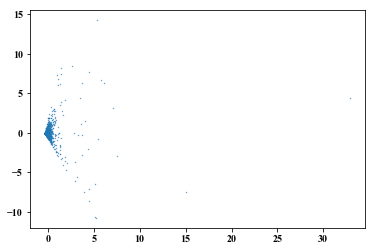

In [16]:
pca = PCA(whiten=True,n_components=10,svd_solver='full')
X_t = pca.fit(X).transform(X)
plt.scatter(X_t[:,0],X_t[:,1],s=0.1)
#plt.xlim(-0.1,.25)

In [18]:
from sklearn.cluster import KMeans

km = KMeans(init='k-means++', n_clusters=10)
km.fit(X_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0,0.5,'G')

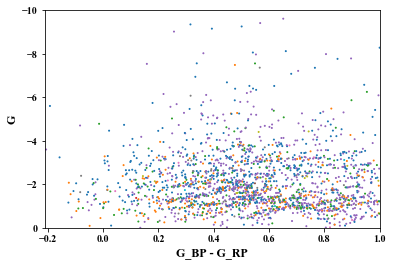

In [22]:
plt.scatter(blue['phot_bp_mean_mag']-blue['phot_rp_mean_mag'],blue['M_G'],
            c=['C{0}'.format(n) for n in km.labels_],s = 1)

plt.xlim(-0.21,1)
plt.ylim(0,-10)
plt.xlabel('G_BP - G_RP')
plt.ylabel('G')